In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve
from scipy.signal import find_peaks
from scipy.optimize import curve_fit



# import lightkurve as lk
# from scipy.optimize import curve_fit

# from astropy.convolution import Gaussian1DKernel
# from astropy.convolution import convolve
sys.path.insert(0, "../")

from michael import janet

Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

In [3]:
j = janet.boot(uni, index=2)


Already have data downloaded for Gaia ID 5311109828992983168.
If you want to check for new data, run `janet.update()`.
No postcard object will be created for this target.
No postcard object will be created for this target.
### Running Simple Astropy Lomb-Scargle on Sector 8-9 on star 5311109828992983168 ###
### Completed Simple Astropy Lomb-Scargle for Sector 8-9 on star 5311109828992983168 ###
### Saved results ###
### Running Wavelet Estimation for Sector 8-9 on star 5311109828992983168 ###


/Users/Anaconda/anaconda3/envs/michael/lib/python3.8/site-packages/jazz_hands-0.0.3-py3.8.egg/jazzhands/wavelets.py:488: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/149 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 8-9 on star 5311109828992983168 ###
### Saved results ###
### Running Composite ACF estimation for Sector 8-9 on star 5311109828992983168 ###
### Completed Composite ACF estimation for Sector 8-9 on star 5311109828992983168 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector 36 on star 5311109828992983168 ###
### Completed Simple Astropy Lomb-Scargle for Sector 36 on star 5311109828992983168 ###
### Saved results ###
### Running Wavelet Estimation for Sector 36 on star 5311109828992983168 ###


  0%|          | 0/75 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 36 on star 5311109828992983168 ###
### Saved results ###
### Running Composite ACF estimation for Sector 36 on star 5311109828992983168 ###
### Completed Composite ACF estimation for Sector 36 on star 5311109828992983168 ###
### Saved results ###
### Running ACF Estimation on star 5311109828992983168 ###
### Completed ACF Estimation on star 5311109828992983168 ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###


/Users/oliver hall/Research/michael/Examples/../michael/methods.py:376: UserWarning: The highest peak in the ACF lies outside the period range of your search.
  warnings.warn("The highest peak in the ACF lies outside the period range of your search.")
/Users/oliver hall/Research/michael/Examples/../michael/validate.py:169: UserWarning: No estimates could agree. Please inspect the results carefully yourself.
  warnings.warn("No estimates could agree. Please inspect the results carefully yourself.")
/Users/oliver hall/Research/michael/Examples/../michael/validate.py:211: UserWarning: One or more sectors disagree strongly across all estimates. Please inspect the results carefully yourself.
  warnings.warn("One or more sectors disagree strongly across all estimates. Please inspect the results carefully yourself.")
/Users/Anaconda/anaconda3/envs/michael/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, c


------ Decoding Overall Period Flag 772 ------
512: One or more sectors disagrees strongly across all estimates with the others. This may indicate signal from a background star present in those sectors.
256: None of the 3 estimates agreed with one another to within 1 sigma. The CACF estimate is assumed to be the best in this case, if it is available.
4: Best rotation is from the Composite Autocorrelation Function (CACF) method.

No other flags raised. 

### Saved results ###


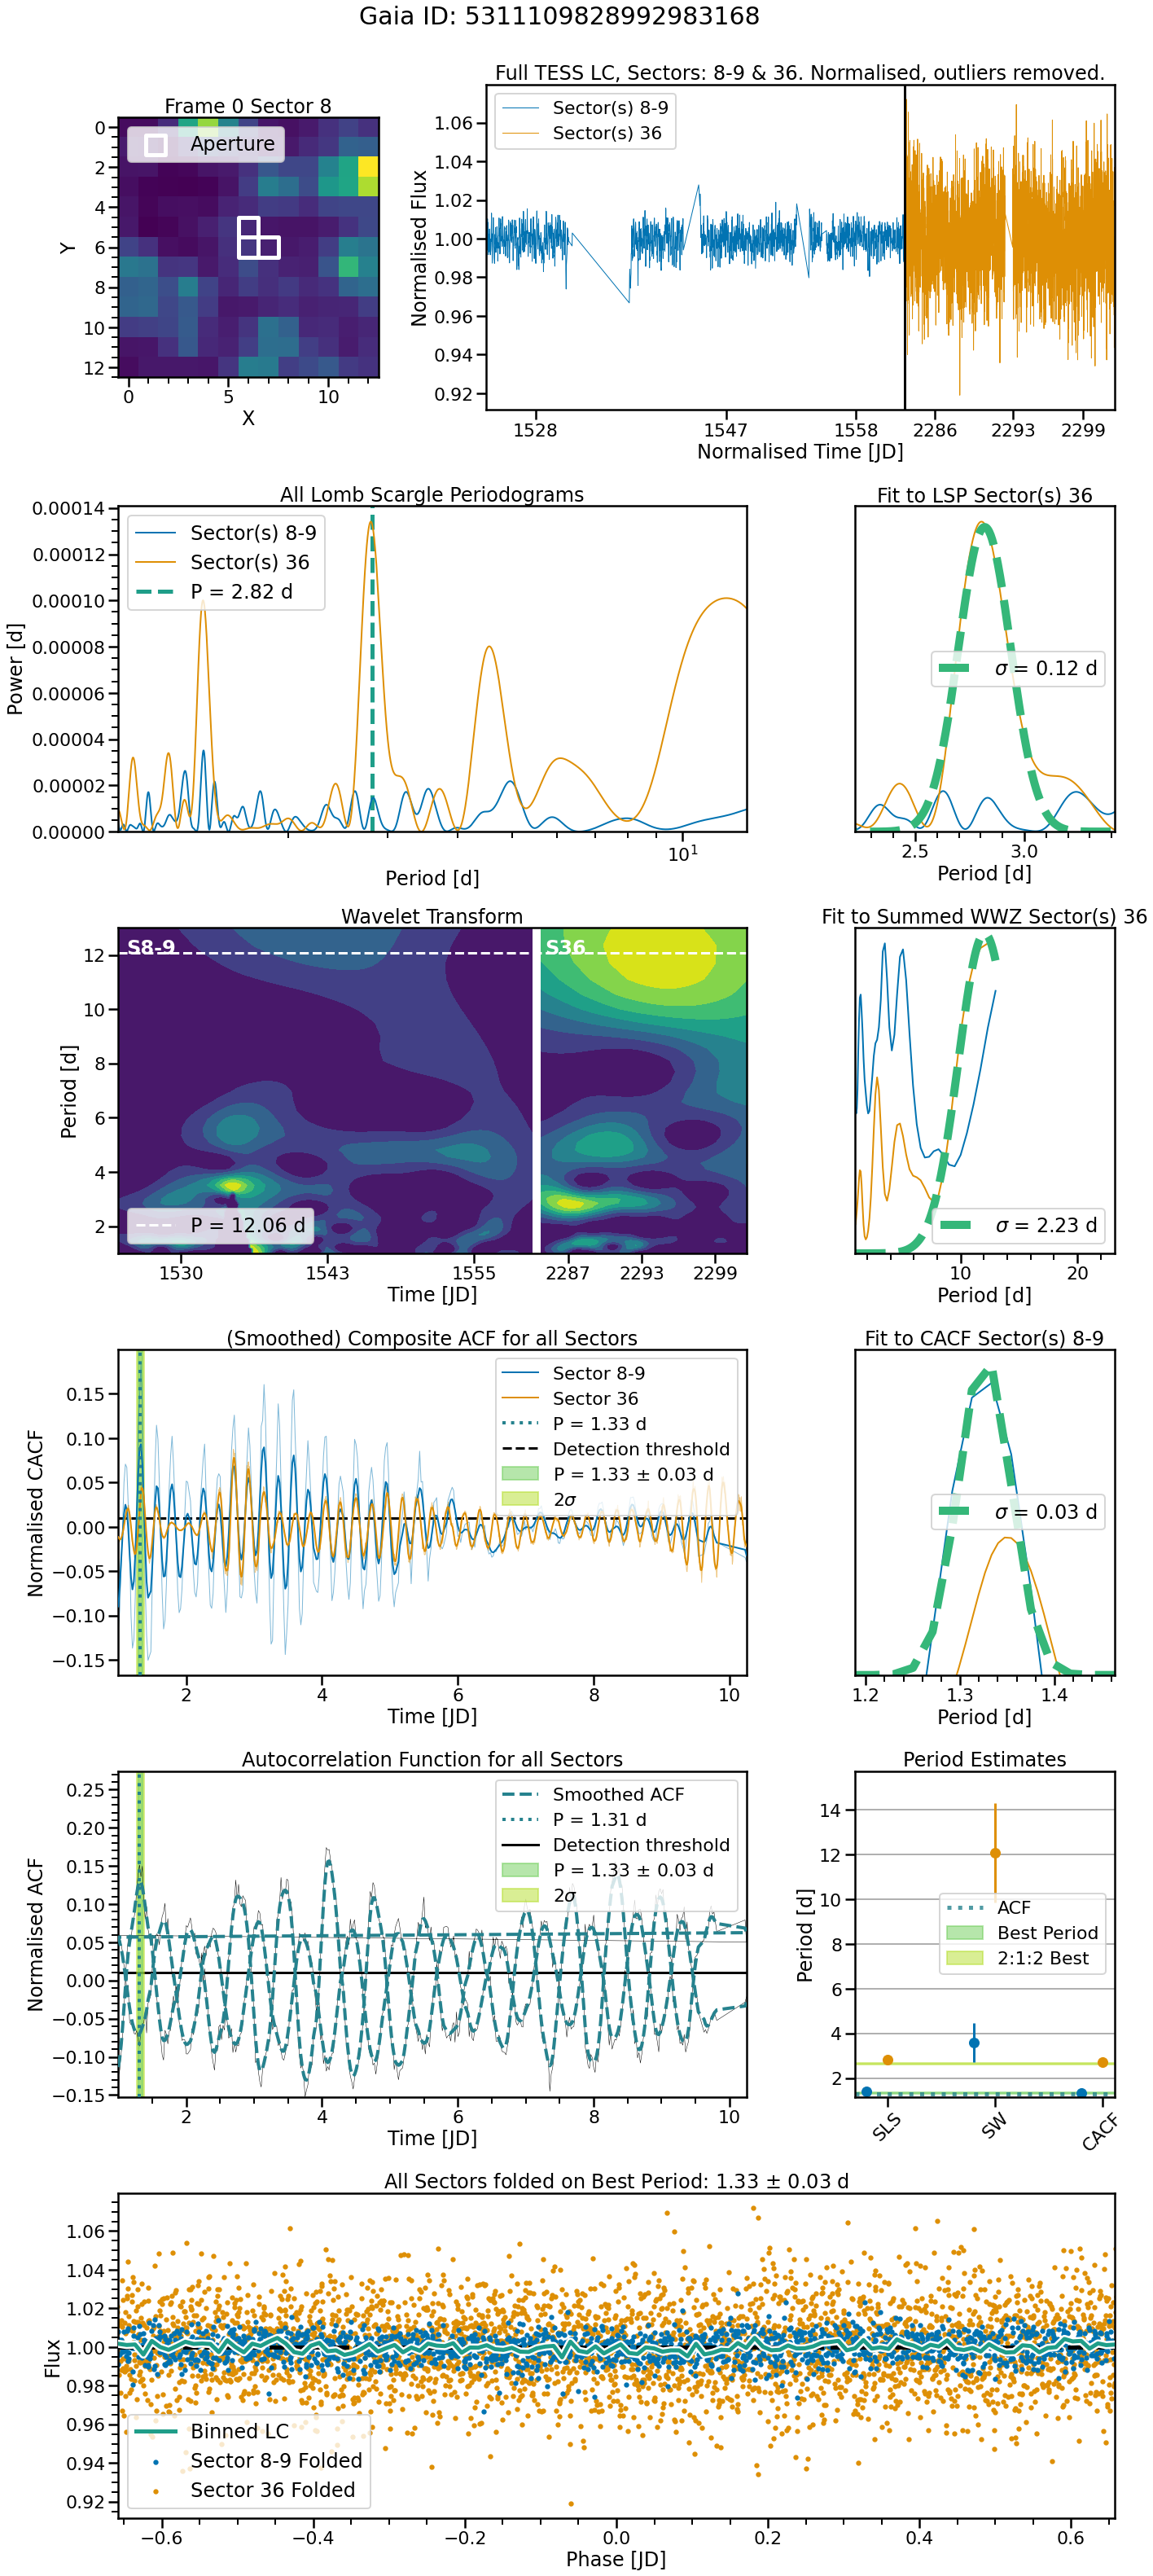

In [4]:
j.run(period_range = (1., 13.))

In [5]:
    s = j.results['f_SLS'] == 0
    if len(j.results[s]) > 0:
        idx = np.array(j.results[s]['h_SLS'].idxmax())
    # It may be the case that there are only flagged values. In this
    # case, ignore the flags
    else:
        idx = np.array(j.results['h_SLS'].idxmax())


In [6]:
np.isfinite(idx.astype(int))

True